# Testing NanoEvents over DY

In [75]:
import sys
sys.path.append('/work/mratti/CoffBHNL/coffea/') # to use the local version

In [76]:
from coffea.nanoaod import NanoEvents

fname = "./nano_dy.root"
events = NanoEvents.from_file(fname)

In [77]:
events.Generator.id1

<VirtualArray [1 -1 -1 ... -1 2 1] at 0x7fb399839690>

In [78]:
from coffea import processor, hist

class MyZPeak(processor.ProcessorABC):
    def __init__(self):
        self._histo = hist.Hist(
            "Events",
            hist.Cat("dataset", "Dataset"),
            hist.Bin("mass", "Z mass", 60, 60, 120),
        )
    
    @property
    def accumulator(self):
        return self._histo
    
    # we will receive a NanoEvents instead of a coffea DataFrame
    def process(self, events):
        out = self.accumulator.identity()
        mmevents = events[events.Muon.counts == 2]
        zmm = mmevents.Muon[:, 0] + mmevents.Muon[:, 1]
        out.fill(
            dataset=events.metadata["dataset"],
            mass=zmm.mass.flatten(),
        )
        return out
    
    def postprocess(self, accumulator):
        return accumulator

In [79]:
samples = {
    "DrellYan": [
        "https://github.com/CoffeaTeam/coffea/raw/master/tests/samples/nano_dy.root",
    ]
}

result = processor.run_uproot_job(
    samples,
    "Events",
    MyZPeak(),
    processor.iterative_executor,
    {"nano": True},
)

<AxesSubplot:xlabel='Z mass', ylabel='Events'>

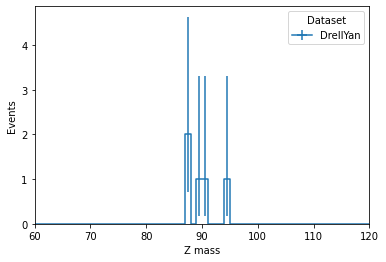

In [80]:
%matplotlib inline

hist.plot1d(result)